In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_dir = './../data/results/'  # Replace with your directory path
allfiles = [f for f in os.listdir(results_dir) if f.endswith('.csv') and '0.02' in f]
allfiles


['stats_P_Q-DPTO_sample0.02.csv',
 'stats_Hp_Q-AGLOMERADO_sample0.02.csv',
 'stats_Hi_Q-Total_sample0.02.csv',
 'stats_Hp_Q-AGLOSI_sample0.02.csv',
 'stats_P_Q-AGLOSI_sample0.02.csv',
 'stats_PAGLO_Q-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_Hp_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_M24_Q-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-PROV_sample0.02.csv',
 'stats_H_Q-AGLOMERADO_sample0.02.csv',
 'stats_Hp_Q-PROV_sample0.02.csv',
 'stats_Hi_Q-AGLOSI_sample0.02.csv',
 'stats_P_Q-PROV_sample0.02.csv',
 'stats_P_Q-Region-AGLOSI_sample0.02.csv',
 'stats_Hi_Q-AGLOMERADO_sample0.02.csv',
 'stats_M24_Q-DPTO_sample0.02.csv',
 'stats_Hi_Q-Region_sample0.02.csv',
 'stats_H_Q-Region-AGLOSI_sample0.02.csv',
 'stats_P_Q-PROV-AGLOSI_sample0.02.csv',
 'stats_P_Q-Total_sample0.02.csv',
 'stats_PAGLO_Q-Region-AGLOSI_sample0.02.csv',
 'stats_M24_Q-P0910_sample0.02.csv',
 'stats_M24_Q-Total_sample0.02.csv',
 'stats_Hp_Q-Region-AGLOSI_sample0.02.csv',
 'stats_Hp_Q-Total_sample0.02.cs

In [31]:
# Dictionary of presidents and their corresponding start dates
presidents = {
    'NK': '2004-01-01',
    'CFK1': '2008-01-01',
    'CFK2': '2012-01-01',
    'MM': '2016-01-01',
    'AF': '2020-01-01'
}

## Cross Section

### Provincias

In [32]:
## Read data from files
files = [f for f in allfiles if 'Q-PROV_' in f and '_P_' in f and '0.02' in f]
# files
# read Q columns as time dtype
data = pd.concat([pd.read_csv(results_dir + file, parse_dates=['Q']) for file in files])

## Extract data for plot
plot_data = data.loc[(data.observable == 'P47T_persona') & (data.base == 'P') & (data['Q'].dt.year == 2022)].groupby(['PROV', 'sintetico'])['valor'].mean().unstack()
poblaciones = data.loc[(data.observable == 'Total') & (data.sintetico == 'sum') & (data['Q'].dt.year == 2022)].groupby(['PROV', 'sintetico'])['valor'].mean().unstack()
plot_data = plot_data.merge(poblaciones, left_index=True, right_index=True)

plot_data = plot_data.sort_values(by='median').reset_index().rename({'sum': 'pop_size'}, axis=1)
plot_data.head()

## Add Names
info = pd.read_csv('./../data/info/radio_ref.csv')
names = info[['PROV', 'NOMPROV']].drop_duplicates()
plot_data = plot_data.merge(names)

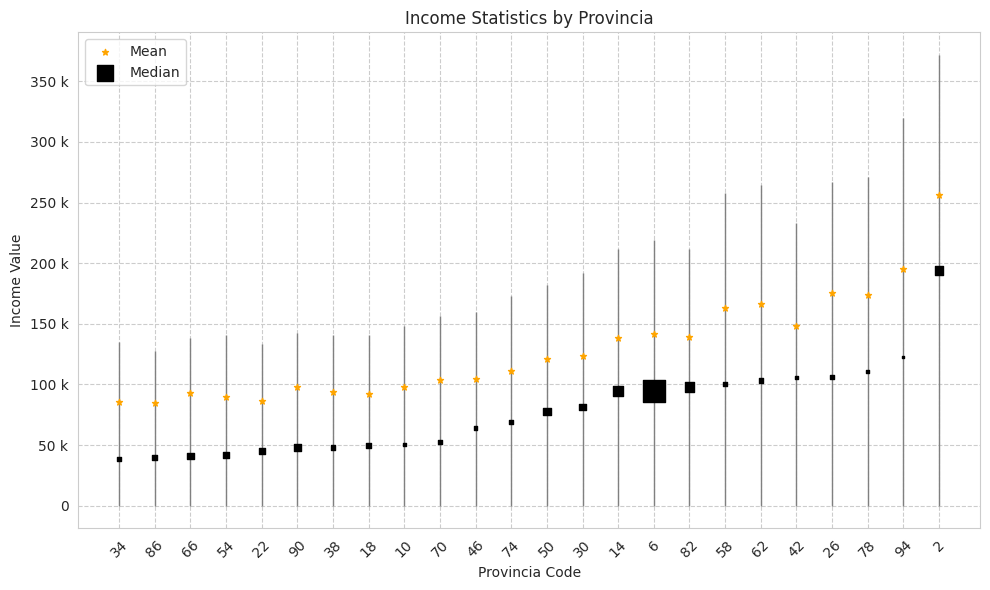

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

# Setting parameters
max_marker_size = 250

# Normalizing the population sizes and scaling by max_marker_size
pop_size_normalized = plot_data['pop_size'] / max(plot_data['pop_size'])
marker_sizes = max_marker_size * pop_size_normalized

# Creating the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.grid(True, linestyle='--')

# Adding the bars for IQR and scatter plots
plt.scatter(plot_data.index, plot_data['mean'], color='orange', marker='*', s=20, label='Mean', zorder = 10)
plt.vlines(x=plot_data.index, ymin=plot_data['q25'], ymax=plot_data['q75'], color='grey', linewidth=1)
plt.scatter(plot_data.index, plot_data['median'], color='black', marker='s', s=marker_sizes, label='Median', zorder=10)

# Adding labels and title
plt.ylabel('Income Value')
plt.xlabel('Provincia Code')
plt.title('Income Statistics by Provincia')
plt.xticks(ticks=plot_data.index, labels=plot_data['PROV'], rotation=45)

# Setting the y-axis to engineering notation
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Adding legend
plt.legend(loc = 'upper left')

# Showing the plot
plt.tight_layout()
plt.show()


### AGLOMERADOS

In [34]:
## Read data from files
files = [f for f in allfiles if 'Q-AGLOMERADO' in f and '_P_' in f and '0.02' in f]
# files
# read Q columns as time dtype
data = pd.concat([pd.read_csv(results_dir + file, parse_dates=['Q']) for file in files])

## Extract data for plot
plot_data = data.loc[(data.observable == 'P47T_persona') & (data.base == 'P') & (data['Q'].dt.year == 2022)].groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack()
poblaciones = data.loc[(data.observable == 'Total') & (data.sintetico == 'sum') & (data['Q'].dt.year == 2022)].groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack()
plot_data = plot_data.merge(poblaciones, left_index=True, right_index=True)

plot_data = plot_data.sort_values(by='median').reset_index().rename({'sum': 'pop_size'}, axis=1)
plot_data.head()


## Add Names
# info = pd.read_csv('./../data/info/radio_ref.csv')
# names = info[['PROV', 'NOMPROV']].drop_duplicates()
# plot_data = plot_data.merge(names)

sintetico,AGLOMERADO,mean,median,q10,q25,q75,q90,pop_size
0,15,96752.5,51822.5,0.0,0.0,151295.0,261522.5,261650.0
1,12,105202.5,57755.0,0.0,0.0,166980.0,274785.0,389700.0
2,18,100302.5,58467.5,0.0,0.0,153927.5,263630.0,414900.0
3,19,104867.5,58697.5,0.0,0.0,162777.5,278040.0,364250.0
4,29,109980.0,59025.0,0.0,0.0,164427.5,288780.0,930600.0


In [35]:
sizes = data.loc[(data.observable == 'Total') & (data.sintetico == 'sum') & (data['Q'].dt.year == 2022)].groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack()
main_units = sizes.sort_values(by='sum', ascending = False).head(24).index
main_units

Index([ 0, 33, 32, 13,  4, 10, 29,  2, 23, 34,  5, 27,  8, 18, 12, 17, 19,  7,
        3,  6, 15, 25, 26,  9],
      dtype='int64', name='AGLOMERADO')

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

# Setting parameters
max_marker_size = 500

# Normalizing the population sizes and scaling by max_marker_size
pop_size_normalized = plot_data['pop_size'] / max(plot_data['pop_size'])
marker_sizes = max_marker_size * pop_size_normalized

# Creating the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.grid(True, linestyle='--')

# Adding the bars for IQR and scatter plots
plt.scatter(plot_data.index, plot_data['mean'], color='orange', marker='*', s=20, label='Mean', zorder = 10)
plt.vlines(x=plot_data.index, ymin=plot_data['q25'], ymax=plot_data['q75'], color='.7', linewidth=1)
plt.scatter(plot_data.index, plot_data['median'], color='black', marker='s', s=marker_sizes, label='Median', zorder=10, alpha = .5)

# Adding labels and title
plt.ylabel('Income Value')
plt.xlabel('Aglomerado Code')
plt.title('Income Statistics by Aglomerado')
plt.xticks(ticks=plot_data.index, labels=plot_data['AGLOMERADO'], rotation=45)

# Setting the y-axis to engineering notation
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Adding legend
plt.legend(loc = 'upper left')

# Showing the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
[f for f in files if 'Q-AGLOMERADO' in f]

['stats_P_Q-AGLOMERADO_sample0.02.csv']

### AGLOMERADOS

In [ ]:
## Read data from files
files = [f for f in allfiles if 'Q-DPTO' in f and '_P_' in f and '0.02' in f]
# files
# read Q columns as time dtype
data = pd.concat([pd.read_csv(results_dir + file, parse_dates=['Q']) for file in files])

## Extract data for plot
plot_data = data.loc[(data.observable == 'P47T_persona') & (data.base == 'P') & (data['Q'].dt.year == 2022)].groupby(['DPTO', 'sintetico'])['valor'].mean().unstack()
poblaciones = data.loc[(data.observable == 'Total') & (data.sintetico == 'sum') & (data['Q'].dt.year == 2022)].groupby(['DPTO', 'sintetico'])['valor'].mean().unstack()
plot_data = plot_data.merge(poblaciones, left_index=True, right_index=True)

plot_data = plot_data.sort_values(by='median').reset_index().rename({'sum': 'pop_size'}, axis=1)
plot_data.head()




sintetico,DPTO,mean,median,q10,q25,q75,q90,pop_size
0,58028,122160.0,0.0,0.0,0.0,192175.0,368352.5,4850.0
1,42014,96227.5,0.0,0.0,0.0,148632.5,278040.0,2550.0
2,22161,68542.5,0.0,0.0,0.0,101532.5,194742.5,4900.0
3,70126,69010.0,0.0,0.0,0.0,107417.5,187652.5,18200.0
4,86028,56877.5,0.0,0.0,0.0,94610.0,160315.0,24300.0


In [ ]:
## Filter data by sizes.

sizes = data.loc[(data.observable == 'Total') & (data.sintetico == 'sum') & (data['Q'].dt.year == 2022)].groupby(['DPTO', 'sintetico'])['valor'].mean().unstack()
main_units = sizes.sort_values(by='sum', ascending = False).head(50).index
main_units

plot_data = plot_data.loc[plot_data.DPTO.isin(main_units)]

In [ ]:
# Add Names
info = pd.read_csv('./../data/info/radio_ref.csv')
names = info[['DPTO', 'NOMDPTO', 'NOMPROV']].drop_duplicates()
plot_data = plot_data.merge(names, how = 'left')

# Function to update NOMDPTO
def update_nomdpto(row):
    if 'Capital' in row['NOMDPTO']:
        if 'San' not in row['NOMPROV']:
            return f"{row['NOMDPTO']}, {row['NOMPROV'][:4]}."
        else:
            return f"{row['NOMDPTO']}, {row['NOMPROV']}"
    return row['NOMDPTO']

# Applying the transformation
plot_data['NOMDPTO'] = plot_data.apply(update_nomdpto, axis=1)


plot_data.head()


,DPTO,mean,median,q10,q25,q75,q90,pop_size,NOMDPTO,NOMPROV
0,34014,95220.0,48002.5,0.0,0.0,145960.0,257122.5,274250.0,Formosa,Formosa
1,6274,107287.5,54317.5,0.0,0.0,169415.0,291637.5,530850.0,Florencio Varela,Buenos Aires
2,6560,113842.5,55447.5,0.0,0.0,174602.5,301732.5,547600.0,Moreno,Buenos Aires
3,6412,110995.0,56055.0,0.0,0.0,176360.0,295372.5,313500.0,José C. Paz,Buenos Aires
4,18021,104365.0,57060.0,0.0,0.0,164987.5,271135.0,402000.0,"Capital, Corr.",Corrientes


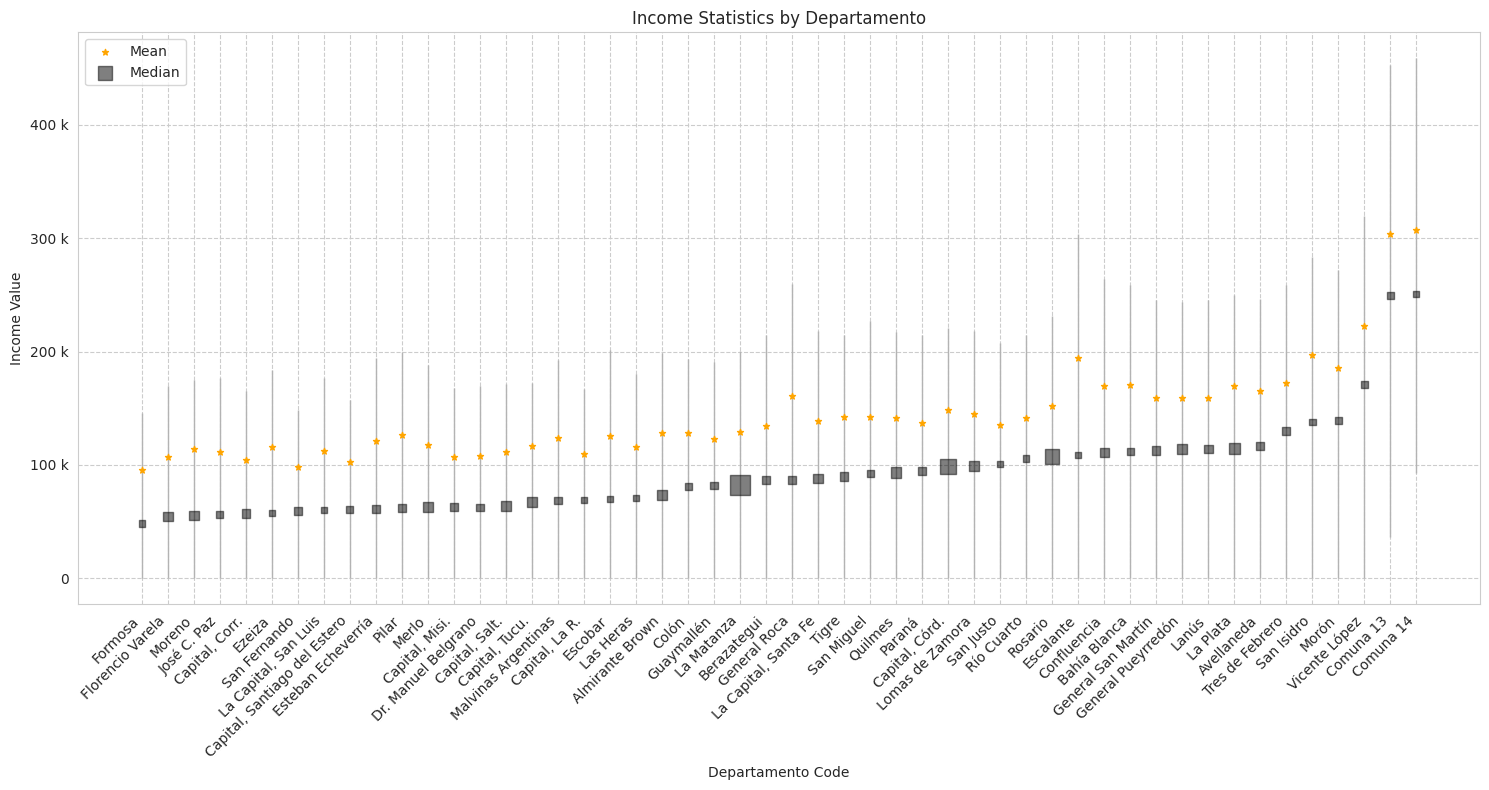

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

# Setting parameters
max_marker_size = 200

# Normalizing the population sizes and scaling by max_marker_size
pop_size_normalized = plot_data['pop_size'] / max(plot_data['pop_size'])
marker_sizes = max_marker_size * pop_size_normalized

# Creating the plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
plt.grid(True, linestyle='--')

# Adding the bars for IQR and scatter plots
plt.scatter(plot_data.index, plot_data['mean'], color='orange', marker='*', s=20, label='Mean', zorder = 10)
plt.vlines(x=plot_data.index, ymin=plot_data['q25'], ymax=plot_data['q75'], color='.7', linewidth=1)
plt.scatter(plot_data.index, plot_data['median'], color='black', marker='s', s=marker_sizes, label='Median', zorder=10, alpha = .5)

# Adding labels and title
plt.ylabel('Income Value')
plt.xlabel('Departamento Code')
plt.title('Income Statistics by Departamento')
# plt.xticks(ticks=plot_data.index, labels=plot_data['DPTO'], rotation=45)
plt.xticks(ticks=plot_data.index, labels=plot_data['NOMDPTO'], rotation=45, ha = 'right')

# Setting the y-axis to engineering notation
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Adding legend
plt.legend(loc = 'upper left')

# Showing the plot
plt.tight_layout()
plt.show()


## Series de Tiempo

In [ ]:
[f for f in files if 'Total' in f]

[]

In [ ]:
[f for f in files if 'Q-AGLOSI' in f]

[]

In [ ]:

# CBA mean of hogares
# 'stats_H_Q-Total_sample0.02.csv',


# pobreza
# indigencia
# mean
# Aglosi = true
# 'stats_H_Q-Total_sample0.02.csv',


# cant de indigentes (hogares y personas)
# indigencia
# sum
#  'stats_H_Q-AGLOSI_sample0.02.csv'
#   'stats_P_Q-AGLOSI_sample0.02.csv'


# p47t hogar
# p47t persona
# median
# 'stats_H_Q-Total_sample0.02.csv',
# 'stats_M24_Q-Total_sample0.02.csv',


# gap_indigencia
# median
# 'stats_H_Q-Total_sample0.02.csv',
# 'stats_Hi_Q-Total_sample0.02.csv',

# indigencia 
# # mean
# 'stats_Hp_Q-Total_sample0.02.csv',

# CBEQUIV
# Aglosi / no
# mean
# 'stats_H_Q-AGLOSI_sample0.02.csv',

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [100]:

# files_info = [
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "CBA", "sintetico": "mean", "base_str": "H", "grouper": ["Total"]}, # CBA mean of hogares
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "Pobreza", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # pobreza pct hogares
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "Indigencia", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # indigencia pct hogares
#     {"file": "stats_H_Q-AGLOSI_sample0.02.csv", "observable": "Indigencia", "sintetico": "sum", "base_str": "H", "grouper": ["AGLOSI"]}, # cant de indigentes (hogares) aglo si/no
#     {"file": "stats_P_Q-AGLOSI_sample0.02.csv", "observable": "Indigencia", "sintetico": "sum", "base_str": "P", "grouper": ["AGLOSI"]}, # cant de indigentes (personas) aglo si/no
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "P47T_hogar", "sintetico": "median", "base_str": "H", "grouper": ["Total"]}, # ingreso mediano hogar
#     {"file": "stats_M24_Q-Total_sample0.02.csv", "observable": "P47T_persona", "sintetico": "median", "base_str": "M24", "grouper": ["Total"]}, # ingreso mediano persona
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "gap_indigencia", "sintetico": "median", "base_str": "H", "grouper": ["Total"]}, # gap indigencia Hogares
#     {"file": "stats_Hi_Q-Total_sample0.02.csv", "observable": "gap_indigencia", "sintetico": "median", "base_str": "Hi", "grouper": ["Total"]}, # gap indigencia hogares indigentes
#     {"file": "stats_Hp_Q-Total_sample0.02.csv", "observable": "Indigencia", "sintetico": "mean", "base_str": "Hp", "grouper": ["Total"]}, # indigencia hogares pobres
#     {"file": "stats_H_Q-AGLOSI_sample0.02.csv", "observable": "CBEQUIV", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # CBEQUIV mean  hogares
#     # Add any additional series information as needed
# ]


results_dir = './../data/results/'  # Replace with the actual path

graph_info = {
    "CBA mean of hogares": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "CBA", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "pobreza pct hogares_AGLOSI": {
        "file": "stats_H_Q-AGLOSI_sample0.02.csv", 
        "observable": "Pobreza", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["AGLOSI"]
    },
    "pobreza pct personas_AGLOSI": {
        "file": "stats_P_Q-AGLOSI_sample0.02.csv", 
        "observable": "Pobreza", 
        "sintetico": "mean", 
        "base_str": "P", 
        "grouper": ["AGLOSI"]
    },
    "indigencia pct hogares_AGLOSI": {
        "file": "stats_H_Q-AGLOSI_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["AGLOSI"]
    },
    "indigencia pct personas_AGLOSI": {
        "file": "stats_P_Q-AGLOSI_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "mean", 
        "base_str": "P", 
        "grouper": ["AGLOSI"]
    },
    "pobreza pct hogares_Total": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "Pobreza", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "pobreza pct personas_Total": {
        "file": "stats_P_Q-Total_sample0.02.csv", 
        "observable": "Pobreza", 
        "sintetico": "mean", 
        "base_str": "P", 
        "grouper": ["Total"]
    },
    "indigencia pct hogares_Total": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "indigencia pct personas_Total": {
        "file": "stats_P_Q-Total_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "mean", 
        "base_str": "P", 
        "grouper": ["Total"]
    },
    "cant de indigentes (hogares) aglo si/no": {
        "file": "stats_H_Q-AGLOSI_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "sum", 
        "base_str": "H", 
        "grouper": ["AGLOSI"]
    },
    "cant de indigentes (personas) aglo si/no": {
        "file": "stats_P_Q-AGLOSI_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "sum", 
        "base_str": "P", 
        "grouper": ["AGLOSI"]
    },
    "cant de pobres (hogares) aglo si/no" : {
        "file": "stats_H_Q-AGLOSI_sample0.02.csv",
        "observable": "Pobreza",
        "sintetico": "sum",
        "base_str": "H",
        "grouper": ["AGLOSI"]
    },
    "cant de pobres (personas) aglo si/no" : {
        "file": "stats_P_Q-AGLOSI_sample0.02.csv",
        "observable": "Pobreza",
        "sintetico": "sum",
        "base_str": "P",
        "grouper": ["AGLOSI"]
    },
    "ingreso mediano hogar": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "P47T_hogar", 
        "sintetico": "median", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "ingreso mediano persona": {
        "file": "stats_M24_Q-Total_sample0.02.csv", 
        "observable": "P47T_persona", 
        "sintetico": "median", 
        "base_str": "M24", 
        "grouper": ["Total"]
    },
    "gap indigencia Hogares": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "gap_indigencia", 
        "sintetico": "median", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "gap indigencia hogares indigentes": {
        "file": "stats_Hi_Q-Total_sample0.02.csv", 
        "observable": "gap_indigencia", 
        "sintetico": "median", 
        "base_str": "Hi", 
        "grouper": ["Total"]
    },
    "indigencia hogares pobres": {
        "file": "stats_Hp_Q-Total_sample0.02.csv", 
        "observable": "Indigencia", 
        "sintetico": "mean", 
        "base_str": "Hp", 
        "grouper": ["Total"]
    },
    "CBEQUIV mean  hogares": {
        "file": "stats_H_Q-AGLOSI_sample0.02.csv", 
        "observable": "CBEQUIV", 
        "sintetico": "mean", 
        "base_str": "H", 
        "grouper": ["AGLOSI"]
    },
}

# Ejemplo de cómo acceder a la información para un gráfico específico
graph_name = "CBA mean of hogares"
graph_specific_info = graph_info[graph_name]

print(graph_specific_info)


{'file': 'stats_H_Q-Total_sample0.02.csv', 'observable': 'CBA', 'sintetico': 'mean', 'base_str': 'H', 'grouper': ['Total']}


In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import colorsys

# # Define the graph name
# graph_name = "pobreza pct hogares"

# # Assuming results_dir and graph_info are already defined
# file_info = graph_info[graph_name]

# print('Processing: ', file_info["file"])
# path = os.path.join(results_dir, file_info["file"])
# df = pd.read_csv(path)

# df['Q'] = pd.to_datetime(df['Q'])
# df = df.sort_values('Q')

# # Filtering the data based on the observable and sintetico
# group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

# fig, ax = plt.subplots(figsize=(10, 6))

# # Define a base color
# base_color = plt.cm.viridis(0.5)

# def adjust_lightness(color, factor):
#     # Convert RGB to HLS
#     h, l, s = colorsys.rgb_to_hls(*color[:3])
#     # Adjust lightness
#     l = max(min(l * factor, 1), 0)
#     # Convert back to RGB
#     return colorsys.hls_to_rgb(h, l, s) + (color[3],)

# for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
#     # Lighten the color for one of the groups
#     color = base_color if name else adjust_lightness(base_color, 1.5)

#     # Scatter plot for raw data
#     ax.scatter(group['Q'], group['valor'], color=color, s=10, label=f"{name} {file_info['observable']} {file_info['sintetico']} raw")

#     # 4-point window average with 1 step lag
#     group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
#     ax.plot(group['Q'], group['moving_avg'], color=color, linestyle='--', label=f"{name} {file_info['observable']} {file_info['sintetico']} avg")

#     # Filling the area between 25th and 75th percentiles for specific observables
#     if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
#         group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
#         group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
#         ax.fill_between(group['Q'], group['q25'], group['q75'], color=color, alpha=0.3)

# ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_ylim(bottom=0)
# ax.legend()
# plt.show()


Processing:  stats_P_Q-AGLOSI_sample0.02.csv
Base value for group (False,): P
Base value for group (True,): P


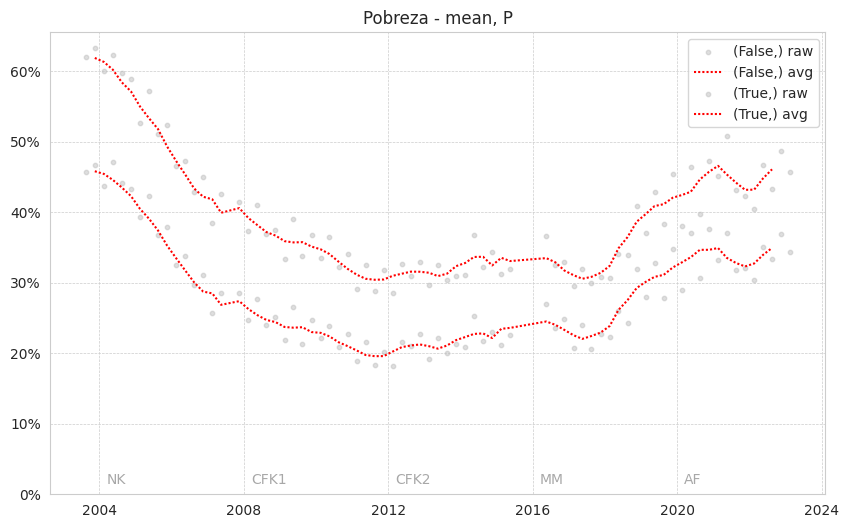

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import colorsys

# # Define the graph name
# graph_name = "pobreza pct personas_AGLOSI"

# # Assuming results_dir and graph_info are already defined
# file_info = graph_info[graph_name]

# print('Processing: ', file_info["file"])
# path = os.path.join(results_dir, file_info["file"])
# df = pd.read_csv(path)

# df['Q'] = pd.to_datetime(df['Q'])
# df = df.sort_values('Q')

# # Filtering the data based on the observable and sintetico
# group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

# fig, ax = plt.subplots(figsize=(10, 6))

# # Define colors for groups
# dark_grey = '.5'
# light_grey = '#BFBFBF'
# red_color = '#FF0000'

# # Define markers
# markers = {'H': 's', 'P': 'o'}  # 's' is for square, 'o' is for dot

# # Define dash patterns
# dash_styles = {'H': (4, 1.5), 'P': (1, 1)}  # Custom dash patterns

# for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
#     # Check for the number of unique 'base' values in the current group
#     unique_bases = group['base'].unique()
#     if len(unique_bases) != 1: print(f"Warning: More than one 'base' value found in group {name}: {unique_bases}")
#     # We can safely use the first (and only) value for plotting
#     base_value = unique_bases[0]; print(f"Base value for group {name}: {base_value}")

#     # Assign color and marker based on base_value
#     color = dark_grey if base_value == 'H' else light_grey
#     marker = markers[base_value]
#     dash_style = dash_styles[base_value]

#     # Continue with plotting...
#     # Scatter plot for raw data with markers
#     ax.scatter(group['Q'], group['valor'], color=color, s=15 if base_value == 'H' else 10, label=f"{name} raw", marker=marker, alpha = .5)

#     # 4-point window average with 1 step lag and dash style
#     group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
#     ax.plot(group['Q'], group['moving_avg'], color=red_color, linestyle='--', label=f"{name} avg", dashes=dash_style)

#     # Filling the area between 25th and 75th percentiles for specific observables
#     if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
#         group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
#         group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
#         ax.fill_between(group['Q'], group['q25'], group['q75'], color=color, alpha=0.3)

# # Format y-axis to show percentages
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_ylim(bottom=0)
# ax.legend()

# # Add annotations for presidents
# for pres, date in presidents.items():
#     ax.annotate(pres, xy=(pd.to_datetime(date), 0), xytext=(5, 5), ## italic
#                 textcoords='offset points', ha='left', va='bottom', alpha = 0.4, )

# # Show the plot
# plt.show()

In [99]:
# Function to plot individual group data
def plot_group_data(ax, group, name, style_dict, file_info):
    # Determine base value and handle cases with multiple 'base' values
    unique_bases = group['base'].unique()
    if len(unique_bases) > 1:
        print(f"Warning: More than one 'base' value found in group {name}: {unique_bases}")
        return  # Skip plotting this group
    
    base_value = unique_bases[0]

    # Extract styles
    color = style_dict['colors']['dark_grey'] if base_value == 'H' else style_dict['colors']['light_grey']
    marker = style_dict['markers'][base_value]
    dash_style = style_dict['dash_styles'][base_value]
    line_color = style_dict['colors']['red'] if 'AGLOSI' in file_info["file"] else style_dict['colors']['black']
    line_alpha = style_dict['alpha_values'].get(bool(name[0]), 0.2)  # Convert name[0] to boolean
    
    # 4-point moving average, shifted by 2
    group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
    ax.plot(group['Q'], group['moving_avg'], color=line_color, linestyle='--', label=f"{name} avg", dashes=dash_style, alpha=line_alpha, lw = 1)

    # Scatter plot for raw data
    scatter_size = 15 if base_value == 'H' else 10
    ax.scatter(group['Q'], group['valor'], color=color, s=scatter_size, label=f"{name} raw", marker=marker, alpha=0.5)

    # Fill between 25th and 75th percentiles for specific observables
    if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
        group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
        group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
        ax.fill_between(group['Q'], group['q25'], group['q75'], color=color, alpha=0.3)

    # You can add more plotting details here as needed

ylims = [(0, 0.25), (0, .75)]

# Function to configure the y-axis and title of the axis
def configure_axis_pct(ax, graph_name, file_info):
    # Format y-axis to show percentages
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    # Set title with dynamic content based on file_info
    ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
    ax.set_ylim(ylims[0] if 'indigencia' in graph_name else ylims[1])

# Function to set minor locator and grid based on the graph_name
def set_minor_locator_and_grid(ax, graph_name, ylims):
    if 'indigencia' in graph_name:
        minor_locator_interval = 0.01
        ax.set_ylim(ylims[0])
    else:
        minor_locator_interval = 0.02
        ax.set_ylim(ylims[1])
    # Set minor locator
    ax.yaxis.set_minor_locator(plt.MultipleLocator(minor_locator_interval))
    # Set grid for minor ticks
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

# Function to add annotations for presidents
def add_annotations(ax, presidents):
    for pres, date in presidents.items():
        ax.annotate(pres, xy=(pd.to_datetime(date), 0), xytext=(5, 5),
                    textcoords='offset points', ha='left', va='bottom', alpha=0.4, bbox=dict(boxstyle='round,pad=0.1', fc='white', alpha=0.5) )


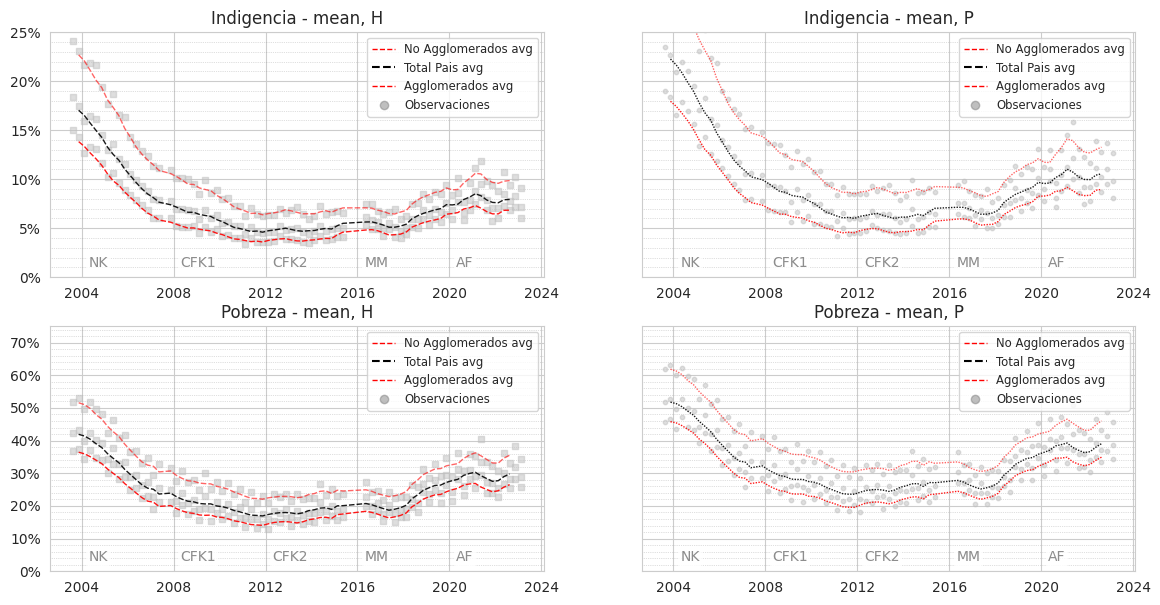

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines
import matplotlib.markers as mmarkers

# Define your graph names
graph_names = {
    "Total": [
        "indigencia pct hogares_Total",
        "indigencia pct personas_Total",
        "pobreza pct hogares_Total",
        "pobreza pct personas_Total",
    ],
    "AGLOSI": [
        "indigencia pct hogares_AGLOSI",
        "indigencia pct personas_AGLOSI",
        "pobreza pct hogares_AGLOSI",
        "pobreza pct personas_AGLOSI",
    ]
}

# Define style settings
style_dict = {
    'colors': {
        'dark_grey': '.75',
        'light_grey': '.75',
        'black': 'k',
        'red': '#FF0000'
    },
    'markers': {'H': 's', 'P': 'o'},  # 's' is for square, 'o' is for dot
    'dash_styles': {'H': (4, 1.5), 'P': (1, 1)},  # Custom dash patterns
    'alpha_values': {True: .9, False: 0.6},
}

# Function to plot data
def plot_data(ax, graph_name, style_dict, results_dir, graph_info, presidents, ylims):    # Load the data
    file_info = graph_info[graph_name]
    path = os.path.join(results_dir, file_info["file"])
    df = pd.read_csv(path)
    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

    # Filter the data
    group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

    # Plot each group
    for name, group in group_subset.groupby(file_info["grouper"]):
        # Apply styles and plotting logic here
        # ...
        base_value = group['base'].unique()[0] if len(group['base'].unique()) == 1 else None
        if base_value is None:
            print(f"Skipping group {name}: multiple 'base' values found.")
            continue

        plot_group_data(ax, group, name, style_dict, file_info)

        
        # Plotting calls (scatter, plot, fill_between) here using the extracted styles
    # Configure axis, set grid, and add annotations
    configure_axis_pct(ax, graph_name, file_info)
    set_minor_locator_and_grid(ax, graph_name, ylims)
    add_annotations(ax, presidents)
    ax.legend(fontsize = 8)


# Create a 2x2 subplot structure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7), sharey='row')
axes = axes.flatten()  # Flatten the 2D array of axes

# Define y-limits for each row
ylims = [(0, 0.25), (0, .75)]

# Loop over each graph type and corresponding axis
for graph_type, names in graph_names.items():
    for ax, graph_name in zip(axes, names):
        plot_data(ax, graph_name, style_dict, results_dir, graph_info, presidents, ylims)
        ax.get_legend().get_texts()
        # Set minor locator based on the range of the y-axis

        # Create custom legend handles
        avg_line_no_agglom = mlines.Line2D([], [], color='red', linestyle='--', lw = 1, label='No Agglomerados avg')
        avg_line = mlines.Line2D([], [], color='black', linestyle='--', label='Total Pais avg')
        avg_line_agglom = mlines.Line2D([], [], color='red', linestyle='--', lw = 1, label='Agglomerados avg')
        raw_marker = mlines.Line2D([], [], color='gray', marker='o', linestyle='None', alpha=0.5, label='Observaciones')

        # Define which handles to show in the legend
        handles = [avg_line_no_agglom, avg_line, avg_line_agglom, raw_marker]

        # Add the custom legend to the desired axis (for example, the first axis of the last row)
        ax.legend(handles=handles, fontsize='small', loc='upper right')


# Show the plot
plt.show()

In [112]:


# Function to plot data
def plot_data(ax, graph_name, style_dict, results_dir, graph_info, presidents):
    # Load the data
    file_info = graph_info[graph_name]
    path = os.path.join(results_dir, file_info["file"])
    df = pd.read_csv(path)
    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

    # Filter the data
    group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

    # Define the width of each bar and the offset
    bar_width = 100  # or another appropriate value
    spacing = 130  # This is the additional spacing between the groups

    # # Calculate bar_width and spacing based on the x-axis range
    # x_range = mdates.date2num(df['Q'].max()) - mdates.date2num(df['Q'].min())
    # bar_width = bar_width * x_range
    # spacing = spacing * x_range

    # Plot each group
    for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
        # Apply styles and plotting logic here
        base_value = group['base'].unique()[0] if len(group['base'].unique()) == 1 else None
        if base_value is None:
            print(f"Skipping group {name}: multiple 'base' values found.")
            continue

        color = style_dict['colors']['red'] if name[0] else style_dict['colors']['orange']
        marker = style_dict['markers'][base_value]
        dash_style = style_dict['dash_styles'][base_value]

        # Scatter plot for raw data with markers
        ax.scatter(group['Q'], group['valor'], color='lightgray', s=15 if base_value == 'H' else 10, label=f"{name} raw", marker=marker, alpha=0.6)

        # 4-point window average with 1 step lag and dash style
        group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-1)
        ax.plot(group['Q'], group['moving_avg'], color=color, linestyle='--', dashes=dash_style, label=f"{name} avg", lw=0.7)

        # Group by year and calculate the mean of 'moving_avg' for each year
        yearly_avg = group.set_index('Q')['moving_avg'].resample('Y').mean()

        # Offset the x-values for the bars and shift them half a year forward
        offset = (-spacing / 2 if i == 0 else spacing / 2)
        bar_positions = yearly_avg.index + pd.DateOffset(months=-8) + pd.to_timedelta(offset, unit='D')

        # Plot bars for the yearly averages
        ax.bar(bar_positions, yearly_avg.values, width=bar_width, color=color, edgecolor='None', alpha=0.5, label=f"{name} yearly avg")

         # Configure axis, set grid, and add annotations
        configure_axis_values(ax, graph_name, file_info, ylims = [(0, 4e6), (0, 12e6)])
        # Add the custom legend to the desired axis
        ax.legend(fontsize='small', loc='upper right')
        

def configure_axis_values(ax, graph_name, file_info, ylims):
    # Set y-axis formatter for the current axis to show thousands and millions in human readable abbreviation
    def human_readable_format(x, pos):
        if x >= 1e6:  # if x is in millions
            return '{:.1f}M'.format(x*1e-6)
        elif x >= 1e3:  # if x is in thousands
            return '{:.0f}k'.format(x*1e-3)
        else:  # if x is less than a thousand
            return str(int(x))

    ax.yaxis.set_major_formatter(plt.FuncFormatter(human_readable_format))

    # Set y-limits based on the graph type. This assumes you have a specific way to determine which ylims to use based on the graph_name.
    if 'indigentes' in graph_name:
        ax.set_ylim(ylims[0])
    elif 'pobres' in graph_name:
        ax.set_ylim(ylims[1])
    else:
        ax.set_ylim(ylims[0])  # Default ylims if none of the conditions above are met

    # Set title with dynamic content based on file_info
    ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")

    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)


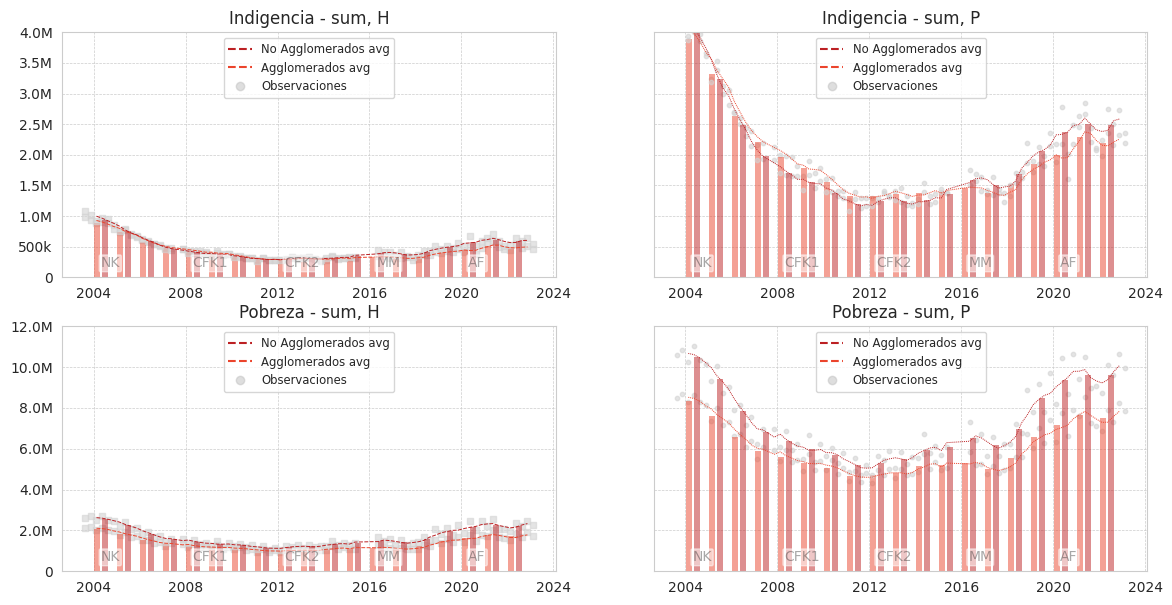

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines
import matplotlib.markers as mmarkers


# Define your graph names
graph_names = {
    "AGLOSI": [
        "cant de indigentes (hogares) aglo si/no",
        "cant de indigentes (personas) aglo si/no",
        "cant de pobres (hogares) aglo si/no",
        "cant de pobres (personas) aglo si/no",
    ]
}


# Define style settings
style_dict = {
    'colors': {
        'orange': '#EB442C',
        'light_grey': '.75',
        'black': 'k',
        'red': '#BC2023'
    },
    'markers': {'H': 's', 'P': 'o'},  # 's' is for square, 'o' is for dot
    'dash_styles': {'H': (4, 1.5), 'P': (1, 1)},  # Custom dash patterns
    'alpha_values': {True: .9, False: 0.6},
}
    # # Define colors for groups
    # orange_color = '#EB442C'
    # red_color = '#BC2023'
    # # Hex Codes: #094A25, #0C6B37, #F8B324, #EB442C, #BC2023, GNYLRD

results_dir = './../data/results'  # You need to set this to your actual directory

# Define the width of each bar and the offset
bar_width = 0.02  # a fraction of the x-axis range to be determined dynamically
spacing = 0.025  # additional spacing between the groups, as a fraction of the x-axis range


# Create a 2x2 subplot structure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7), sharey='row')
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop over each graph type and corresponding axis
for graph_type, names in graph_names.items():
    for ax, graph_name in zip(axes, names):

        
        plot_data(ax, graph_name, style_dict, results_dir, graph_info, presidents)
        
        # Legend
        # ax.get_legend().get_texts()
        # Set minor locator based on the range of the y-axis
        # Define the colors for Aglomerados and No Aglomerados
        color_no_agglom = style_dict['colors']['red']
        color_agglom = style_dict['colors']['orange']        # Create the legend handles
        avg_line_no_agglom = mlines.Line2D([], [], color=color_no_agglom, linestyle='--', label='No Agglomerados avg')
        avg_line_agglom = mlines.Line2D([], [], color=color_agglom, linestyle='--', label='Agglomerados avg')
        raw_marker = mlines.Line2D([], [], color=style_dict['colors']['light_grey'], marker='o', linestyle='None', alpha=0.5, label='Observaciones')
        # Define which handles to show in the legend
        handles = [avg_line_no_agglom, avg_line_agglom, raw_marker]

        # Add the custom legend to the desired axis (for example, the first axis of the last row)
        ax.legend(handles=handles, fontsize='small', loc='upper center')
        add_annotations(ax, presidents)


# Show the plot
plt.show()

In [ ]:
import matplotlib.dates as mdates


Processing:  stats_H_Q-AGLOSI_sample0.02.csv
Base value for group (False,): H
Base value for group (True,): H


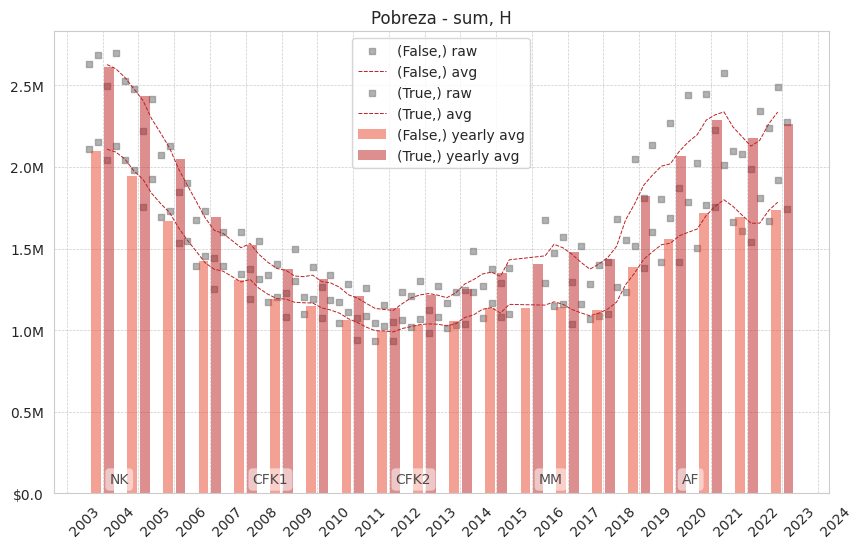

In [ ]:
# # Assuming results_dir and graph_info are already defined
# file_info = graph_info[graph_name]

# print('Processing: ', file_info["file"])
# path = os.path.join(results_dir, file_info["file"])
# df = pd.read_csv(path)

# df['Q'] = pd.to_datetime(df['Q'])
# df = df.sort_values('Q')

# # Filtering the data based on the observable and sintetico
# group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

# fig, ax = plt.subplots(figsize=(10, 6))

# # Define colors for groups
# orange_color = '#EB442C'
# red_color = '#BC2023'
# # Hex Codes: #094A25, #0C6B37, #F8B324, #EB442C, #BC2023, GNYLRD

# # Define markers
# markers = {'H': 's', 'P': 'o'}  # 's' is for square, 'o' is for dot

# # Define dash patterns
# dash_styles = {'H': (4, 1.5), 'P': (2, 3)}  # Custom dash patterns

# # Define the width of each bar and the offset
# bar_width = 100  # or another appropriate value

# # Spacing between groups of bars
# spacing = 130  # This is the additional spacing between the groups


# for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
#     # Check for the number of unique 'base' values in the current group
#     unique_bases = group['base'].unique()
#     if len(unique_bases) != 1: print(f"Warning: More than one 'base' value found in group {name}: {unique_bases}")
#     # We can safely use the first (and only) value for plotting
#     base_value = unique_bases[0]; print(f"Base value for group {name}: {base_value}")

#     # Assign color and marker based on base_value
#     color = red_color if name[0] == True else orange_color
#     marker = markers[base_value]
#     dash_style = dash_styles[base_value]

#     # Continue with plotting...
#     # Scatter plot for raw data with markers
#     ax.scatter(group['Q'], group['valor'], color='.5', s=15 if base_value == 'H' else 10, label=f"{name} raw", marker=marker, alpha = .6)

#     # 4-point window average with 1 step lag and dash style
#     group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-1)
#     ax.plot(group['Q'], group['moving_avg'], color=red_color, linestyle='--', label=f"{name} avg", dashes=dash_style, lw = 0.7)

#     # Calculate rolling average with a shift of -1
#     group['moving_avg'] = group['valor'].rolling(window=4).mean().shift()

#     # Group by year and calculate the mean of 'moving_avg' for each year
#     yearly_avg = group.set_index('Q')['moving_avg'].resample('Y').mean()

#     # Offset the x-values for the bars
#     # The first group will be shifted to the left by half the spacing, and the second group to the right
#     offset = (-spacing / 2 if i == 0 else spacing / 2)

#     # Offset the x-values for the bars and shift them half a year forward
#     bar_positions = yearly_avg.index + pd.DateOffset(months=-12) + pd.to_timedelta(offset, unit='D')

#     # Plot bars for the yearly averages
#     ax.bar(bar_positions, yearly_avg.values, width=bar_width, color=color, edgecolor='None', alpha=0.5, label=f"{name} yearly avg")

#     # Filling the area between 25th and 75th percentiles for specific observables
#     if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
#         group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
#         group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
#         ax.fill_between(group['Q'], group['q25'], group['q75'], color='.5', alpha=0.3)

# # # Format y-axis to show percentages
# # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


# # Set x-axis major locator and formatter for yearly ticks
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# for label in ax.get_xticklabels():
#     label.set_rotation(45)
#     label.set_horizontalalignment('left')
# ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_ylim(bottom=0)
# ax.legend()

# # Add annotations for presidents
# for pres, date in presidents.items():
#     ax.annotate(pres, xy=(pd.to_datetime(date), 0), xytext=(5, 5), ## italic
#                 textcoords='offset points', ha='left', va='bottom', alpha = 0.8, backgroundcolor = 'white',
#                                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.5, edgecolor='none'))
    
# def human_readable_format(x, pos):
#     # Assuming the values are in dollars and you want to represent thousands as 'k'
#     # return '${:,.0f}k'.format(x*1e-3) if x != 0 else '${:,.0f}'.format(x)
# # human readable millions:
#     return '{:,.1f}M'.format(x*1e-6) if x != 0 else '${:,.1f}'.format(x)

# # Set y-axis formatter for the current axis
# ax.yaxis.set_major_formatter(FuncFormatter(human_readable_format))



# # Show the plot
# plt.show()

In [ ]:
xx

Processing:  stats_H_Q-Total_sample0.02.csv
mean:  419619.0625
Processing:  stats_M24_Q-Total_sample0.02.csv
mean:  221778.26388888888


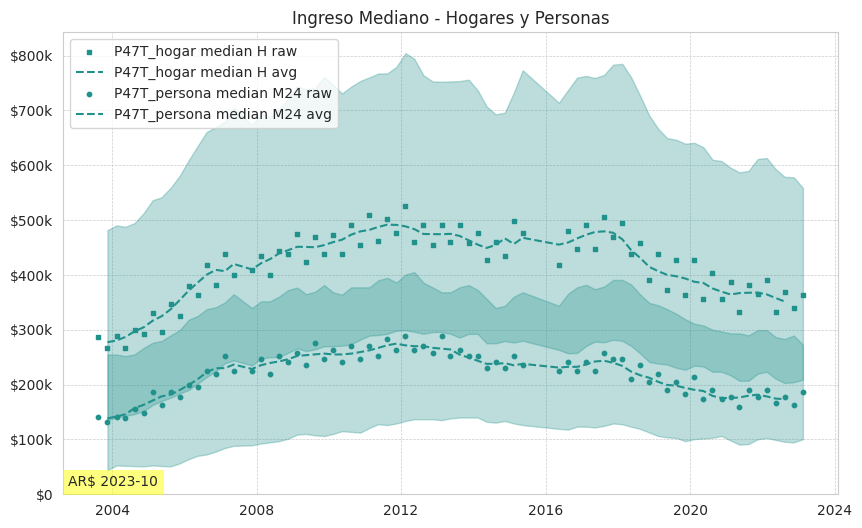

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import colorsys

results_dir = './../data/results/'  # Replace with the actual path

graph_info = {
    "ingreso mediano hogar": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "P47T_hogar", 
        "sintetico": "median", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "ingreso mediano persona": {
        "file": "stats_M24_Q-Total_sample0.02.csv", 
        "observable": "P47T_persona", 
        "sintetico": "median", 
        "base_str": "M24", 
        "grouper": ["Total"]
    },
    # ... other graph_info entries ...
}

def human_readable_format(x, pos):
    # Assuming the values are in dollars and you want to represent thousands as 'k'
    return '${:,.0f}k'.format(x*1e-3) if x != 0 else '${:,.0f}'.format(x)



graph_names = ["ingreso mediano hogar", "ingreso mediano persona"]

fig, ax = plt.subplots(figsize=(10, 6))
# ax2 = ax.twinx()  # Create a second y-axis

# Define a base color
base_color = plt.cm.viridis(0.5)

def adjust_lightness(color, factor):
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*color[:3])
    # Adjust lightness
    l = max(min(l * factor, 1), 0)
    # Convert back to RGB
    return colorsys.hls_to_rgb(h, l, s) + (color[3],)

# Define marker styles for households and individuals
marker_styles = {'H': 's', 'M24': 'o'}

for graph_name in graph_names:
    file_info = graph_info[graph_name]

    print('Processing: ', file_info["file"])
    path = os.path.join(results_dir, file_info["file"])
    df = pd.read_csv(path)

    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

    # Filtering the data based on the observable and sintetico
    group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

    for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
        # Choose marker style based on household/individual
        marker_style = marker_styles[file_info['base_str']]

        # Scatter plot for raw data
        ax.scatter(group['Q'], group['valor'], color=base_color, marker=marker_style, s=10, label=f"{file_info['observable']} {file_info['sintetico']} {file_info['base_str']} raw")

        # 4-point window average with 1 step lag
        group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
        # print('mean: ', group['moving_avg'].mean())
        ax.plot(group['Q'], group['moving_avg'], color=base_color, linestyle='--', label=f"{file_info['observable']} {file_info['sintetico']} {file_info['base_str']} avg")

        # Filling the area between 25th and 75th percentiles for specific observables
        if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
            # Filtering the data for 25th and 75th percentiles
            q25_group = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == 'q25')]
            q75_group = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == 'q75')]

            # Ensure the groups have the same length
            if len(q25_group) == len(q75_group) == len(group):
                q25_rolling_avg = q25_group['valor'].rolling(window=2).mean()
                q75_rolling_avg = q75_group['valor'].rolling(window=2).mean()
                ax.fill_between(group['Q'], q25_rolling_avg, q75_rolling_avg, color=base_color, alpha=0.3)
            else:
                print("The lengths of the groups for percentiles and median are not the same.")

    # Set y-axis formatter for the current axis
    ax.yaxis.set_major_formatter(FuncFormatter(human_readable_format))

def human_readable_format(x, pos):
    # Assuming the values are in dollars and you want to represent thousands as 'k'
    return '${:,.0f}k'.format(x*1e-3) if x != 0 else '${:,.0f}'.format(x)

# Add annotations for the AR$ 2023-10 with a yellow background
fig.text(0.13, 0.13, 'AR$ 2023-10', ha='left', va='center', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='none'))

ax.set_title("Ingreso Mediano - Hogares y Personas")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left')
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
import colorsys
from matplotlib.ticker import FuncFormatter

Processing:  stats_H_Q-Total_sample0.02.csv
The lengths of the groups for percentiles and median are not the same.
Processing:  stats_Hi_Q-Total_sample0.02.csv
The lengths of the groups for percentiles and median are not the same.


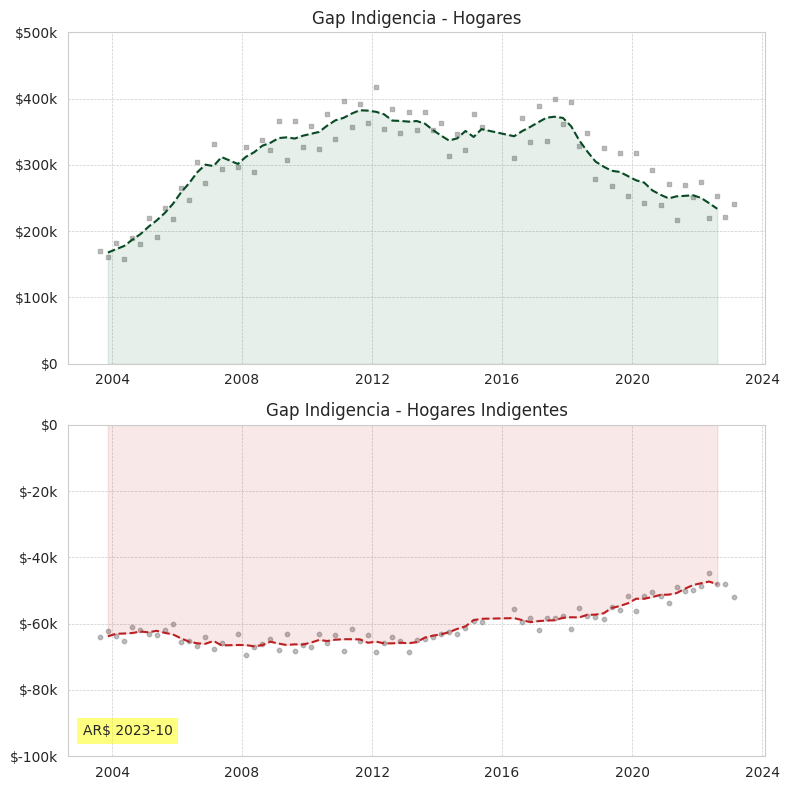

In [ ]:


results_dir = './../data/results/'  # Replace with the actual path

graph_info = {
    "gap indigencia Hogares": {
        "file": "stats_H_Q-Total_sample0.02.csv", 
        "observable": "gap_indigencia", 
        "sintetico": "median", 
        "base_str": "H", 
        "grouper": ["Total"]
    },
    "gap indigencia hogares indigentes": {
        "file": "stats_Hi_Q-Total_sample0.02.csv", 
        "observable": "gap_indigencia", 
        "sintetico": "median", 
        "base_str": "Hi", 
        "grouper": ["Total"]
    },
    # ... other graph_info entries ...
}



graph_names = ["gap indigencia Hogares", "gap indigencia hogares indigentes"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # 1 row, 2 columns

# Define colors
# Hex Codes: #094A25, #0C6B37, #F8B324, #EB442C, #BC2023, GNYLRD
green_color = '#094A25'
red_color = '#BC2023'

def adjust_lightness(color, factor):
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*color[:3])
    # Adjust lightness
    l = max(min(l * factor, 1), 0)
    # Convert back to RGB
    return colorsys.hls_to_rgb(h, l, s) + (color[3],)

# Define marker styles for households and individuals
marker_styles = {'H': 's', 'Hi': 'o'}

for graph_name in graph_names:
    file_info = graph_info[graph_name]

    print('Processing: ', file_info["file"])
    path = os.path.join(results_dir, file_info["file"])
    df = pd.read_csv(path)

    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')

    # Filtering the data based on the observable and sintetico
    group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

    for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
        # Choose marker style based on household/individual
        marker_style = marker_styles[file_info['base_str']]

        # Choose the appropriate axis and color
        if file_info['base_str'] == 'H':
            current_ax = ax1
            color = green_color
        else:  # 'Hi'
            current_ax = ax2
            color = red_color

        # Scatter plot for raw data
        current_ax.scatter(group['Q'], group['valor'], color='.5', alpha = .5, marker=marker_style, s=10, label=f"{file_info['observable']} {file_info['sintetico']} {file_info['base_str']} raw")

        # 4-point window average with 1 step lag
        group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
        current_ax.plot(group['Q'], group['moving_avg'], color=color, linestyle='--', label=f"{file_info['observable']} {file_info['sintetico']} {file_info['base_str']} avg")

        # Fill between the rolling average and zero
        positive_mask = group['moving_avg'] > 0
        negative_mask = group['moving_avg'] < 0
        current_ax.fill_between(group['Q'], 0, group['moving_avg'].where(positive_mask), color='#0C6B37', alpha=0.1)
        current_ax.fill_between(group['Q'], 0, group['moving_avg'].where(negative_mask), color='#BC2023', alpha=0.1)


        # Filling the area between 25th and 75th percentiles for specific observables
        if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
            # Filtering the data for 25th and 75th percentiles
            q25_group = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == 'q25')]
            q75_group = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == 'q75')]

            # Ensure the groups have the same length
            if len(q25_group) == len(q75_group) == len(group):
                q25_rolling_avg = q25_group['valor'].rolling(window=2).mean().shift(-1)
                q75_rolling_avg = q75_group['valor'].rolling(window=2).mean().shift(-1)
                current_ax.fill_between(group['Q'], q25_rolling_avg, q75_rolling_avg, color=color, alpha=0.3)
            else:
                print("The lengths of the groups for percentiles and median are not the same.")

            # Set ylim and add grid
            if file_info['base_str'] == 'H':
                current_ax.set_ylim(0, 5e5)
            else:  # 'Hi'
                current_ax.set_ylim(-1e5, 0)
            current_ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set y-axis formatter for the current axis
    current_ax.yaxis.set_major_formatter(FuncFormatter(human_readable_format))

def human_readable_format(x, pos):
    # Assuming the values are in dollars and you want to represent thousands as 'k'
    return '${:,.0f}k'.format(x*1e-3) if x != 0 else '${:,.0f}'.format(x)

# Add annotations for the AR$ 2023-10 with a yellow background
fig.text(0.11, 0.08, 'AR$ 2023-10', ha='left', va='center',
         bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='none'))


# Set titles and layout
ax1.set_title("Gap Indigencia - Hogares")
ax2.set_title("Gap Indigencia - Hogares Indigentes")
fig.tight_layout()
plt.show()


In [ ]:

# files_info = [
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "CBA", "sintetico": "mean", "base_str": "H", "grouper": ["Total"]}, # CBA mean of hogares
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "Pobreza", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # pobreza pct hogares
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "Indigencia", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # indigencia pct hogares
#     {"file": "stats_H_Q-AGLOSI_sample0.02.csv", "observable": "Indigencia", "sintetico": "sum", "base_str": "H", "grouper": ["AGLOSI"]}, # cant de indigentes (hogares) aglo si/no
#     {"file": "stats_P_Q-AGLOSI_sample0.02.csv", "observable": "Indigencia", "sintetico": "sum", "base_str": "P", "grouper": ["AGLOSI"]}, # cant de indigentes (personas) aglo si/no
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "P47T_hogar", "sintetico": "median", "base_str": "H", "grouper": ["Total"]}, # ingreso mediano hogar
#     {"file": "stats_M24_Q-Total_sample0.02.csv", "observable": "P47T_persona", "sintetico": "median", "base_str": "M24", "grouper": ["Total"]}, # ingreso mediano persona
#     {"file": "stats_H_Q-Total_sample0.02.csv", "observable": "gap_indigencia", "sintetico": "median", "base_str": "H", "grouper": ["Total"]}, # gap indigencia Hogares
#     {"file": "stats_Hi_Q-Total_sample0.02.csv", "observable": "gap_indigencia", "sintetico": "median", "base_str": "Hi", "grouper": ["Total"]}, # gap indigencia hogares indigentes
#     {"file": "stats_Hp_Q-Total_sample0.02.csv", "observable": "Indigencia", "sintetico": "mean", "base_str": "Hp", "grouper": ["Total"]}, # indigencia hogares pobres
#     {"file": "stats_H_Q-AGLOSI_sample0.02.csv", "observable": "CBEQUIV", "sintetico": "mean", "base_str": "H", "grouper": ["AGLOSI"]}, # CBEQUIV mean  hogares
#     # Add any additional series information as needed
# ]


results_dir = './../data/results/'  # Replace with the actual path



Processing:  stats_Hp_Q-Total_sample0.02.csv
Base value for group (True,): Hp


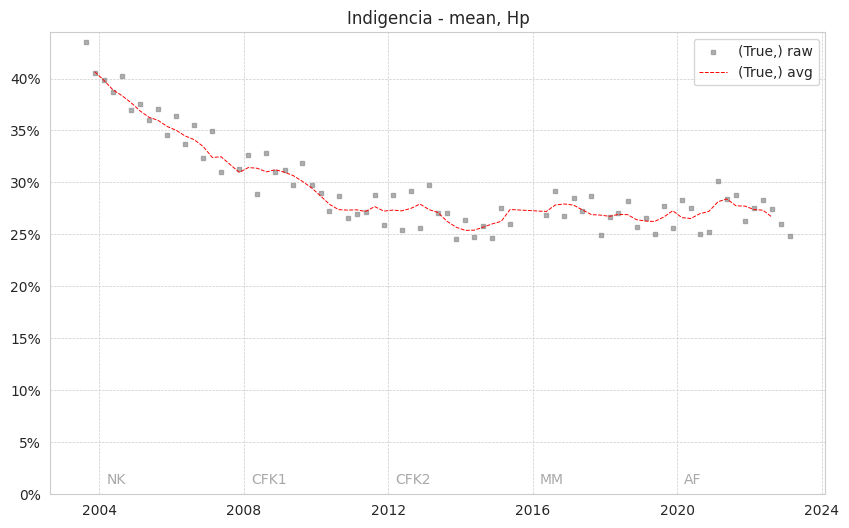

In [ ]:

# Assuming results_dir and graph_info are already defined
file_info = graph_info[graph_name]

print('Processing: ', file_info["file"])
path = os.path.join(results_dir, file_info["file"])
df = pd.read_csv(path)

df['Q'] = pd.to_datetime(df['Q'])
df = df.sort_values('Q')

# Filtering the data based on the observable and sintetico
group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for groups
dark_grey = '.5'
light_grey = '.5'
red_color = '#FF0000'

# Define markers
markers = {'Hp': 's', 'P': 'o'}  # 's' is for square, 'o' is for dot

# Define dash patterns
dash_styles = {'Hp': (4, 1.5), 'P': (2, 3)}  # Custom dash patterns

for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
    # Check for the number of unique 'base' values in the current group
    unique_bases = group['base'].unique()
    if len(unique_bases) != 1: print(f"Warning: More than one 'base' value found in group {name}: {unique_bases}")
    # We can safely use the first (and only) value for plotting
    base_value = unique_bases[0]; print(f"Base value for group {name}: {base_value}")

    # Assign color and marker based on base_value
    color = dark_grey if base_value == 'H' else light_grey
    marker = markers[base_value]
    dash_style = dash_styles[base_value]

    # Continue with plotting...
    # Scatter plot for raw data with markers
    ax.scatter(group['Q'], group['valor'], color=color, s=15 if base_value == 'H' else 10, label=f"{name} raw", marker=marker, alpha = .6)

    # 4-point window average with 1 step lag and dash style
    group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
    ax.plot(group['Q'], group['moving_avg'], color=red_color, linestyle='--', label=f"{name} avg", dashes=dash_style, lw = 0.7)

    # Filling the area between 25th and 75th percentiles for specific observables
    if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
        group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
        group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
        ax.fill_between(group['Q'], group['q25'], group['q75'], color=color, alpha=0.3)

# Format y-axis to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_ylim(bottom=0)
ax.legend()

# Add annotations for presidents
for pres, date in presidents.items():
    ax.annotate(pres, xy=(pd.to_datetime(date), 0), xytext=(5, 5), ## italic
                textcoords='offset points', ha='left', va='bottom', alpha = 0.4, )

# Show the plot
plt.show()

Processing:  result_H_Q-AGLOSI_0.01.csv


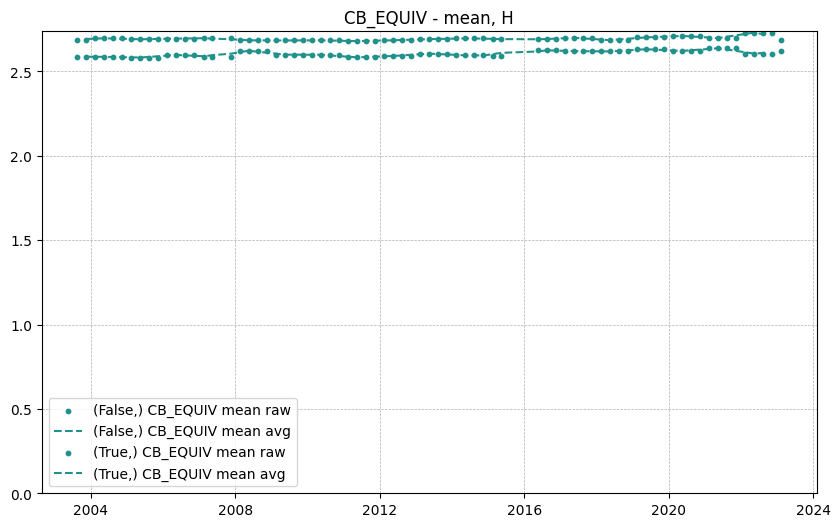

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import colorsys

# graph_name = 'CBEQUIV mean hogares'

# graph_info = {
#         "CBEQUIV mean hogares": {
#         "file": "stats_H_Q-AGLOSI_sample0.02.csv", 
#         "observable": "CB_EQUIV", 
#         "sintetico": "mean", 
#         "base_str": "H", 
#         "grouper": ["AGLOSI"]
#     },
# }

# # Assuming results_dir and graph_info are already defined
# file_info = graph_info[graph_name]

# print('Processing: ', file_info["file"])
# path = os.path.join(results_dir, file_info["file"])
# df = pd.read_csv(path)

# df['Q'] = pd.to_datetime(df['Q'])
# df = df.sort_values('Q')

# # Filtering the data based on the observable and sintetico
# group_subset = df[(df['observable'] == file_info["observable"]) & (df['sintetico'] == file_info["sintetico"])]

# fig, ax = plt.subplots(figsize=(10, 6))

# # Define a base color
# base_color = plt.cm.viridis(0.5)

# def adjust_lightness(color, factor):
#     # Convert RGB to HLS
#     h, l, s = colorsys.rgb_to_hls(*color[:3])
#     # Adjust lightness
#     l = max(min(l * factor, 1), 0)
#     # Convert back to RGB
#     return colorsys.hls_to_rgb(h, l, s) + (color[3],)

# for i, (name, group) in enumerate(group_subset.groupby(file_info["grouper"])):
#     # Lighten the color for one of the groups
#     color = base_color if name else adjust_lightness(base_color, 1.5)

#     # Scatter plot for raw data
#     ax.scatter(group['Q'], group['valor'], color=color, s=10, label=f"{name} {file_info['observable']} {file_info['sintetico']} raw")

#     # 4-point window average with 1 step lag
#     group['moving_avg'] = group['valor'].rolling(window=4).mean().shift(-2)
#     ax.plot(group['Q'], group['moving_avg'], color=color, linestyle='--', label=f"{name} {file_info['observable']} {file_info['sintetico']} avg")

#     # Filling the area between 25th and 75th percentiles for specific observables
#     if file_info["observable"] in ["P47T_hogar", "P47T_persona", "gap_indigencia", "gap_pobreza"]:
#         group['q25'] = group['valor'].rolling(window=4).quantile(0.25)
#         group['q75'] = group['valor'].rolling(window=4).quantile(0.75)
#         ax.fill_between(group['Q'], group['q25'], group['q75'], color=color, alpha=0.3)

# ax.set_title(f"{file_info['observable']} - {file_info['sintetico']}, {file_info['base_str']}")
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_ylim(bottom=0)
# ax.legend()
# plt.show()


In [ ]:
df.observable.value_counts()

observable
P47T_hogar        900
CBA               300
Pobreza           300
Total             300
gap_indigencia    300
gap_pobreza       300
CBT               300
CB_EQUIV          300
Indigencia        300
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

def plot_time_series(df, observable, sintetico, base_str=None, grouper=None):
    """
    Plot the specified time series based on given parameters.
    
    Parameters:
    - df: DataFrame containing the data.
    - observable: The observable to be plotted.
    - sintetico: The sintetico value for the observable.
    - base_str: (Optional) The base string for the data.
    - grouper: (Optional) The grouper columns to filter by.
    """
    subset = df[(df['observable'] == observable) & (df['sintetico'] == sintetico)]
    
    if base_str:
        subset = subset[subset['base'] == base_str]
    
    if grouper:
        for group_values, group_subset in subset.groupby(grouper):
            mask = AND.reduce([(subset[col] == val) for col, val in zip(grouper, group_values)])
            subset = subset[mask]
    
    # Specific plot rules
    if observable in ["CBA", "CBT", "CB_EQUIV"]:
        if sintetico in ["mean", "median"]:
            linestyle = '--' if sintetico == 'mean' else '-'
            plt.plot(subset['Q'], subset['valor'], linestyle=linestyle, label=sintetico)

    # Add rules for other observables and sinteticos as needed...

    plt.title(f"{observable} - {sintetico}")
    plt.legend()
    plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For each file in the directory...
for file in [files[1]]:
    path = os.path.join(results_dir, file)
    df = pd.read_csv(path)
    
    # Convert the 'Q' column to datetime and sort by it
    df['Q'] = pd.to_datetime(df['Q'])
    df = df.sort_values('Q')